## **Problem 1:**
There are various stocks for which we have collected a data set, which all stocks areapparently similar in performance

## **Problem 2:**

How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

## **Problem 3:**

Identify which all stocks are moving together and which all stocks are different from each other.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df= pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
df_new = df.copy()
df_new = df_new.drop('DATE', axis=1)

In [5]:
# apply standard scalar
from sklearn.preprocessing import StandardScaler
features = df_new.values
sc = StandardScaler()
X_scaled = sc.fit_transform(features)

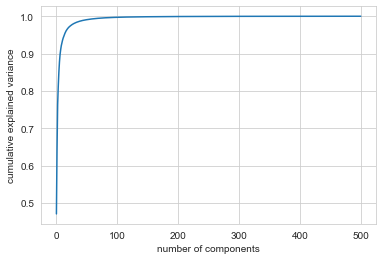

In [6]:
# Determining optimal number of components for PCA looking at the explained variance as a function of the components
sns.set_style('whitegrid')
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [7]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

## 1. Problem

Which all stocks are apparently similar in performance

We can check this by correlation matrix or variance inflation factor(vif)

In [8]:
df1 = df.copy()
df1 = df1.drop(['DATE', 'SP500'], axis=1)

In [9]:
cor = df1.corr()
cor

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NYSE.XRX,0.522341,0.341687,0.806615,-0.017967,0.589464,0.577194,-0.542393,0.696062,0.371468,0.450787,...,0.605548,-0.867222,0.636184,0.717401,-0.623126,1.000000,0.866193,0.785073,0.081512,0.588426
NYSE.XYL,0.395730,0.693062,0.911106,0.067258,0.634191,0.701701,-0.668413,0.679090,0.485314,0.261115,...,0.548014,-0.737225,0.811981,0.610465,-0.798461,0.866193,1.000000,0.842826,-0.246085,0.581894
NYSE.YUM,0.642336,0.627531,0.939185,0.261173,0.418591,0.915175,-0.863792,0.343294,0.770276,0.083384,...,0.825260,-0.862418,0.855050,0.763547,-0.634492,0.785073,0.842826,1.000000,0.018217,0.899693
NYSE.ZBH,0.588241,-0.580055,-0.067235,0.130786,-0.201805,0.016689,0.212780,-0.259731,0.236575,0.417055,...,0.369747,-0.322979,-0.310343,0.339366,0.458027,0.081512,-0.246085,0.018217,1.000000,0.271767


## Problem 2:

How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [10]:
X_transformed = pca.transform(X_scaled)

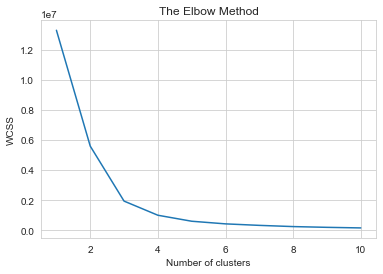

In [12]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(X_transformed)
y_kmeans = kmeans.fit_predict(X_transformed)
labels = k_means.labels_

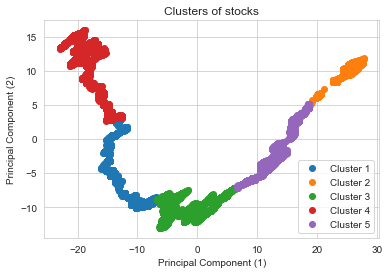

In [17]:
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], label = 'Cluster 1')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1],label = 'Cluster 2')
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], label = 'Cluster 3')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], label = 'Cluster 4')
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], label = 'Cluster 5')

plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

## Problem 3:
Identify which all stocks are moving together and which all stocks are different from each other.

In [19]:
df2 = df.copy()
df2['labels'] = labels
for i in df2['labels'].unique().tolist():
    count = df2[df2['labels'] == i].shape[0]
    print('\nFor lablel {} the number of similar stock performances is : {} '.format(i,count))


For lablel 2 the number of similar stock performances is : 5872 

For lablel 4 the number of similar stock performances is : 8627 

For lablel 1 the number of similar stock performances is : 11167 

For lablel 3 the number of similar stock performances is : 5863 

For lablel 0 the number of similar stock performances is : 9737 
